# Set up your notebook

In [8]:
# import libraries
# set up plot configurations (if required)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, tree, ensemble, neighbors
from sklearn import model_selection, metrics, preprocessing

from __future__ import division, print_function

%matplotlib inline

In [2]:
plt.style.use("fivethirtyeight")

In [49]:
plt.rcParams["figure.figsize"] = [8,5]

# Executive Summary

- Come back to this after your analysis has been completed.

Using information of passengers aboard the Titanic on its first and final voyage, we will perform an analysis to try to understand the different factors behind surviving a disaster under the circumstances faced by the Titanic on that fateful day.

We begin with a visual analysis, which will show us the relationship between certain pieces of information and perhaps provide some intuition as to which of these pieces of information might be more useful.

Thereafter, using various machine learning models, we will also attempt to predict whether a passenger might survive if a similar accident were to occur in the future. Based on the coefficients on our models, we can also glean some insight as to which factors were deemed the most important in coming to a decision. Our models will be scored across various metrics, including accuracy, precision, recall, f1 score, and the ROC curve.

Finally, we explore how some missing pieces of information can be imputed and whether such imputation is of any help in generating a better model.

# Problem Statement

## What are you trying to find out?

- Write a well-formed problem statement, with reference to the SMART guideline. Remember that not all of the letters may apply in all cases, it is just a guideline you can follow.

Based on passenger information of passengers aboard the Titanic on its maiden voyage in April 1912, we will build a model to predict whether or not a passenger will survive if a similar incident were to occur under all the same circumstances of that time. In doing so, we could also try to find the factors which contributed to the survival/ non-survival of some of the passengers on board the ship that fateful day.

## What is your dataset about?

- Describe the dataset in words (you could write a short paragraph, describe the columns, create a data dictionary, etc. but do not include descriptive statistics here)

The dataset contains passenger information of some of the passengers aboard the Titanic in April 1912. 

A data dictionary has been created for the dataset.

| Column | Type | Description | Key |
| --- | --- | --- | --- |
| Passenger ID | Integer | Unique passenger ID
| Survived | Binary | Whether the passenger survived | 0 = no, 1 = yes
| Pclass | Integer | Class of the passenger | 1 = first, 2 = second, 3 = third
| Name | Object | Passenger salutation and name
| Sex | Object | Passenger gender
| Age | Integer | Passenger age
| SipSp | Integer | Number of siblings or spouses on board the ship
| Parch | Integer | Number of parents or children on board the ship
| Ticket | Object | Ticket number
| Fare | Integer | Amount paid for passenger fare
| Cabin | Object | Cabin number
| Embarked | Object | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

[Information source: Kaggle](https://www.kaggle.com/c/titanic/data)

## Risks and Assumptions

- Assumptions:
    - Data is accurately recorded

- Risks:
    - Data does not cover all passengers on the Titanic
    - Approximate number of passengers on board: ~1,317 (source: http://www.titanicfacts.net/titanic-passengers.html)
    - Data may not be representative of the passengers on board
        - In terms of gender, age, and class proportions
    - Missing data
    - SibSp and Parch show if the passenger is travelling in a group or alone, but not all relations are covered (source: https://www.kaggle.com/c/titanic/data)

## Hypothesis

Null hypothesis, $H_0$: There is no relationship between a passenger's gender and his/ her chance of survival on board the Titanic.

Alternative hypothesis, $H_1$: Being a female increases the chances of survival for a passenger on board the Titanic.

## Success Metrics

- __This is something you might consider for your final project. However, we will skip this for Project 4.__

# Exploratory Data Analysis

- Include visualizations, descriptive statistics, etc.

In [4]:
df = pd.read_csv("../assets/titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Missing values

- From the above, we can see that there are missing values in the columns Age, Cabin, and Embarked

## Visualizations

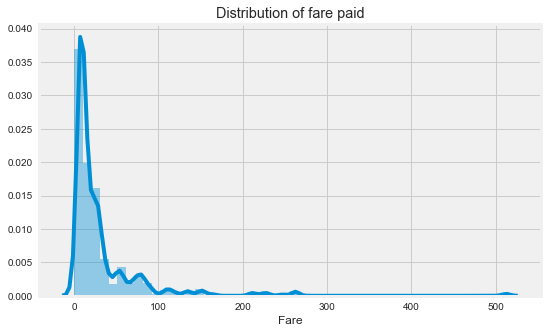

In [31]:
sns.distplot(df["Fare"]);
plt.title("Distribution of fare paid");

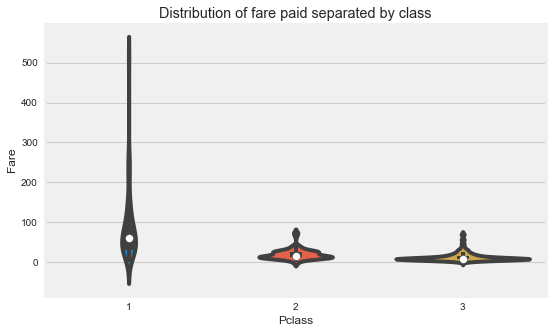

In [60]:
sns.violinplot(y="Fare", x="Pclass", data=df);
plt.title("Distribution of fare paid separated by class");

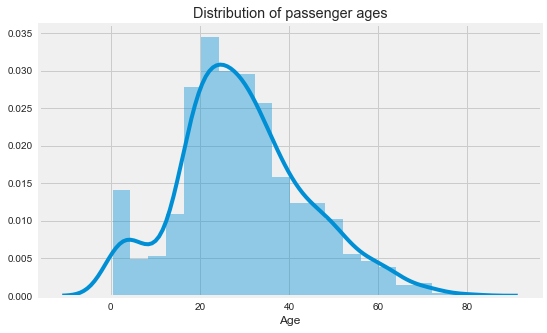

In [32]:
sns.distplot(df["Age"].dropna());
plt.title("Distribution of passenger ages");

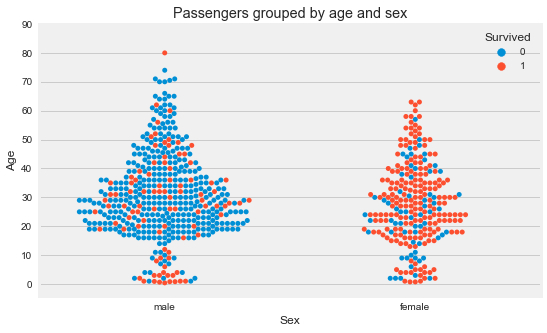

In [16]:
sns.swarmplot(x="Sex", y="Age", hue="Survived", data=df);
plt.title('Passengers grouped by age and sex');
plt.yticks(np.arange(0,100,10));

- __Females seem more likely to survive__

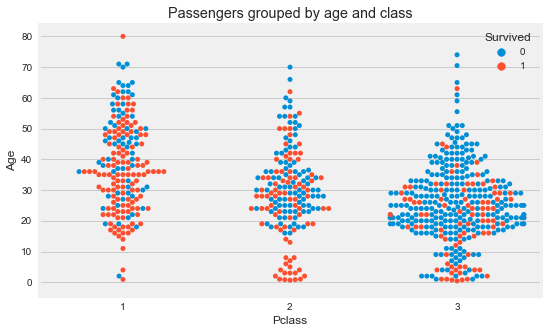

In [18]:
sns.swarmplot(x="Pclass", y="Age", hue="Survived", data=df);
plt.title('Passengers grouped by age and class');
plt.yticks(np.arange(0,90,10));

- __First class passengers seem more likely to survive than second class passengers, who seem more likely to survive than third class passengers__

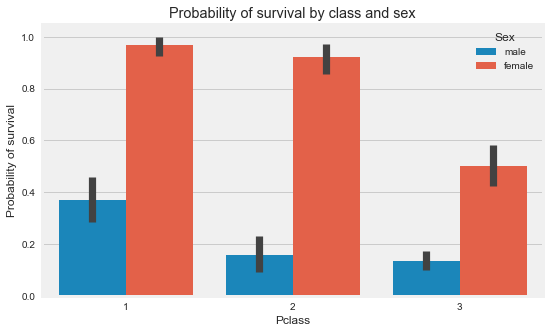

In [37]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df);
plt.title("Probability of survival by class and sex");
plt.ylabel("Probability of survival");

- __Even for females, class makes a different in the probability of survival__

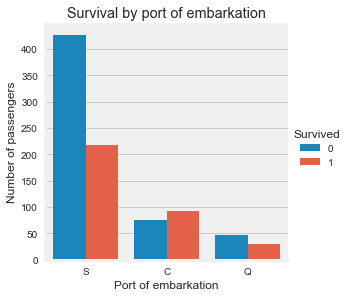

In [51]:
sns.factorplot(x="Embarked", hue="Survived", data=df, kind="count");
plt.title('Survival by port of embarkation');
plt.ylabel("Number of passengers");
plt.xlabel("Port of embarkation");

- __It looks like even the port of embarkation plays a part in survival probability__
    - Why could that be so?

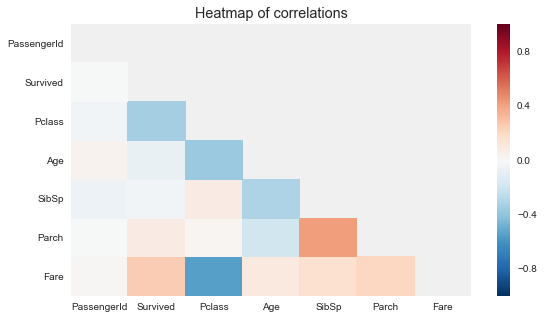

In [62]:
# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), mask=mask);
plt.title("Heatmap of correlations");

- __No major correlations between features except for maybe Fare and Pclass, and Parch and SibSp__

# Data Cleaning

- Prepare your dataset for modeling

In [81]:
# Create a copy of the original dataframe for cleaning
df2 = df.copy()

## Drop missing values

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [83]:
# Drop the Cabin column first because there are just too many missing values there
df2.drop("Cabin", axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [84]:
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


## Get dummies

In [85]:
df2 = pd.get_dummies(df2, columns=["Pclass", "Sex", "Embarked"], drop_first=True)
df2.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,1,0,1


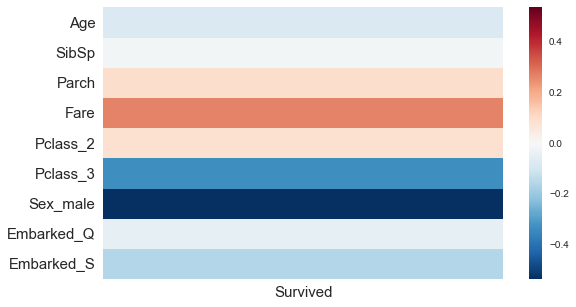

In [86]:
# Look at the correlation between sex and probability of survival

sns.heatmap(df2.corr()[['Survived']].iloc[2:]);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15, rotation='horizontal');

## Define X and y

In [125]:
features = ["Age", "Pclass_2", "Pclass_3", "Sex_male", "Embarked_Q", "Embarked_S"]
X = df2[features].copy()
y = df2["Survived"].copy()

## Splitting into train and test sets

In [126]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.3)

## Scaling

- Depending on the classification model we're using, we may want to scale our features (in my case, only Age)

In [127]:
scaler = preprocessing.StandardScaler()

In [131]:
scaler.fit(X_train[["Age"]]) 
# We only want to scale continuous variables, 
# and we don't want to 'taint' our training data with information from the test data

StandardScaler(copy=True, with_mean=True, with_std=True)

In [132]:
X_train_scaled = X_train.copy()
X_train_scaled["Scaled_age"] = scaler.transform(X_train[["Age"]])
X_train_scaled.drop("Age", axis=1, inplace=True)

X_test_scaled = X_test.copy()
X_test_scaled["Scaled_age"] = scaler.transform(X_test[["Age"]])
X_test_scaled.drop("Age", axis=1, inplace=True)

# Modeling

- Run a classification model (or a few, if you like)
- How do you know how well your model is doing?

In [170]:
# If we're going to run a few models, let's do it efficiently
# Define a function that will instantiate a model
# Fit it to our train and test data
# And evaluate how well the model is doing

def plot_roc(name, ytest, y_score):
    fpr, tpr, threshold = metrics.roc_curve(ytest, y_score)

    plt.plot(fpr, tpr, label='ROC curve of {} (area = {:0.2f})'.format(name, metrics.roc_auc_score(ytest,y_score)));
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.title('ROC curve of various models');
    plt.ylim(np.arange(0,1.2));

def fit_model(model, xtrain, ytrain):
    model.fit(xtrain,ytrain)
    return model
    
def eval_model(model, name, xtrain=X_train_scaled, xtest=X_test_scaled, ytrain=y_train, ytest=y_test):
    model = fit_model(model, xtrain, ytrain)
    y_pred = model.predict(xtest)
    
    y_score = model.predict_proba(xtest)[:,1]
    plot_roc(name, ytest, y_score);
    plt.legend();
    
    print ("------------------------------------------------")
    
    print ("Accuracy of {} model: {}".format(name, metrics.accuracy_score(ytest, y_pred)), end="\n\n")
    
    print ("Classification report for {} model".format(name), end="\n\n")
    print (metrics.classification_report(y_test, y_pred, target_names=['Did_not_survive', 'Survived']))
    
    print ("Confusion matrix for {} model".format(name), end="\n\n")
    conmat = metrics.confusion_matrix(y_test, y_pred)
    conmat = pd.DataFrame(conmat, index=['Did_not_survive', 'Survived'], columns=['Did_not_survive', 'Survived'])
    print (conmat, end="\n\n")

------------------------------------------------
Accuracy of KNN model: 0.8177570093457944

Classification report for KNN model

                 precision    recall  f1-score   support

Did_not_survive       0.83      0.87      0.85       127
       Survived       0.80      0.74      0.77        87

    avg / total       0.82      0.82      0.82       214

Confusion matrix for KNN model

                 Did_not_survive  Survived
Did_not_survive              111        16
Survived                      23        64

------------------------------------------------
Accuracy of Logistic Regression model: 0.7897196261682243

Classification report for Logistic Regression model

                 precision    recall  f1-score   support

Did_not_survive       0.80      0.87      0.83       127
       Survived       0.78      0.68      0.72        87

    avg / total       0.79      0.79      0.79       214

Confusion matrix for Logistic Regression model

                 Did_not_survive  Surv

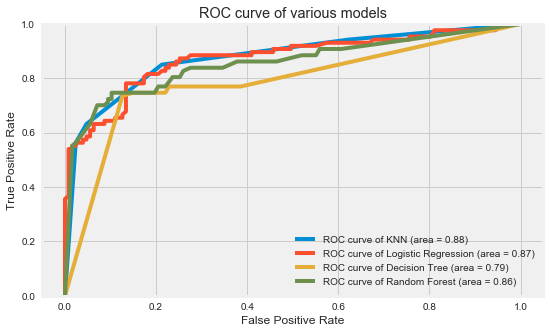

In [171]:
# Evaluate a K nearest neighbors model
eval_model(neighbors.KNeighborsClassifier(), "KNN")


# Evaluate a Logistic Regression model
# I'm using the one with cross validation
eval_model(linear_model.LogisticRegressionCV(cv=5), "Logistic Regression") 

# Evaluate a Decision Tree model
eval_model(tree.DecisionTreeClassifier(), "Decision Tree")

# Evaluate a Random Forest model
eval_model(ensemble.RandomForestClassifier(), "Random Forest")

- __Our models have very similar metrics, perhaps due to the small size of the dataset__
    - Area under the curve is the highest for KNN and Logistic Regression
    - Depending on our level of comfort with the false positive rate (i.e. how high are we willing to go), the ROC curve will help us determine which model we want to use
- __Going back to our problem statement, apart from predicting survival, we also wanted to see how different factors affected probability of survival__
    - To do this, we need to look at our coefficients
        - Which we don't have for K nearest neighbors

In [196]:
logreg = fit_model(linear_model.LogisticRegressionCV(cv=5), X_train, y_train)
dt = fit_model(tree.DecisionTreeClassifier(), X_train, y_train)
rf = fit_model(ensemble.RandomForestClassifier(), X_train, y_train)

In [218]:
odds = np.exp(logreg.coef_[0])
odds

array([ 0.96542651,  0.40446754,  0.12298527,  0.07859318,  0.30486233,
        0.61647285])

In [219]:
pd.DataFrame([X_train.columns, odds], index=["Feature", "Coef"]).T

,Feature,Coef
0,Age,0.965427
1,Pclass_2,0.404468
2,Pclass_3,0.122985
3,Sex_male,0.0785932
4,Embarked_Q,0.304862
5,Embarked_S,0.616473


array([ 3.79503765,  2.92503915,  1.73453228,  1.28675256,  2.64232795,
        3.34648195])

In [201]:
pd.DataFrame([X_train.columns, dt.feature_importances_], index=["Feature", "Importance"])\
.T.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,Age,0.392522
3,Sex_male,0.357858
2,Pclass_3,0.15409
1,Pclass_2,0.0455569
5,Embarked_S,0.0450081
4,Embarked_Q,0.00496489


In [202]:
pd.DataFrame([X_train.columns, rf.feature_importances_], index=["Feature", "Importance"])\
.T.sort_values(by="Importance", ascending=False)

,Feature,Importance
0,Age,0.52067
3,Sex_male,0.340459
2,Pclass_3,0.0847618
1,Pclass_2,0.0270201
5,Embarked_S,0.0192298
4,Embarked_Q,0.00785946


# What does your analysis show?

- What are your findings (in relation to your problem statement)?

Based on the models we have built, we can predict with approximately 80% accuracy whether a passenger will survive a disaster like the sinking of the Titanic given their sex, age, and class. This is on the assumption that all circumstances are exactly as they were on the Titanic (e.g. number of lifeboats, location of cabins by class, structure of the ship, time of the accident etc.).

(As you can see, this model is very limited because of the specific circumstances and also the lack of information. For example, if we had the survival data of more suck vessels, we might be able to build a more general model.)

On the second part of our problem statement, based on the decision tree and random forest tables above, we can see that the most important factors in determining whether a passenger survived are Age and Sex.

Using the table from the logistic regression, we can see how they affect the probability of survival. The odds of survival for a male is only 0.078, all else constant. And for every 1 year increase in age, all else equal, the odds of survival changes by 0.95 (likelihood decreases).

# Bonus

## Impute missing values

- Which columns have missing values that you could impute rather than dropping the whole row?

In [221]:
df3 = df.copy()

### Age

Fill missing values for Age

- How should we go about doing this?
    - We can just fill it in with median age
- But maybe we can try to be a little more accurate?
    - Possible indications of age: Class, salutation
    - Class still seems too wide - each class has a large range of ages, although distribution may differ
    - The names seem to be in the format, LastName, Salutation FirstName, we can probably obtain salutation from this

In [223]:
def get_salute(name):
    name_list = name.split(',')
    name_list = name_list[1].strip().split(' ')
    salute = [i for i in name_list if '.' in i]
    return salute[0].strip('.')

In [224]:
df3['Salute'] = df3['Name'].map(get_salute)
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salute
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [225]:
df3['Salute'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Jonkheer      1
Don           1
Countess      1
Lady          1
Capt          1
Ms            1
Mme           1
Sir           1
Name: Salute, dtype: int64

- We'll keep the top 5 (because a doctor can be male or female), and try to group the rest into the top 5
    - Rev, Major, Col, Jonkheer, Don, Capt, Sir - Mr
        - Jonkheer - Dutch honorific of nobility (source: https://en.wikipedia.org/wiki/Jonkheer)
        - Don - honorific title used in Spain, Portugal, Italy, Iberoamerica and the Philippines (source: https://en.wikipedia.org/wiki/Don_(honorific))
    - Mlle, Ms, Lady - Miss
        - Mlle - mademoiselle (source: http://grammaire.cordial-enligne.fr/manuels/MONSIEUR.htm)
        - Mme, Countess - Mrs
        - Mme - madame (source: http://grammaire.cordial-enligne.fr/manuels/MONSIEUR.htm)

In [226]:
def group_salute(pf):
    if pf in ['Rev', 'Major', 'Col', 'Jonkheer', 'Don', 'Capt', 'Sir']:
        return 'Mr'
    elif pf in ['Mlle', 'Ms', 'Lady']:
        return 'Miss'
    elif pf in ['Mme', 'Countess']:
        return 'Mrs'
    else:
        return pf

In [227]:
df3['Salute'] = df3['Salute'].map(group_salute)

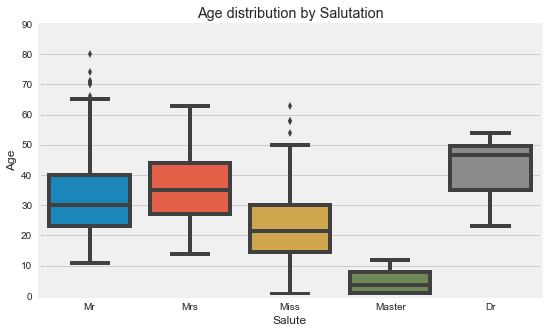

In [228]:
# See what our age distributions look like

sns.boxplot(x='Salute', y='Age', data=df3);
plt.title('Age distribution by Salutation');
plt.ylim(0,90);

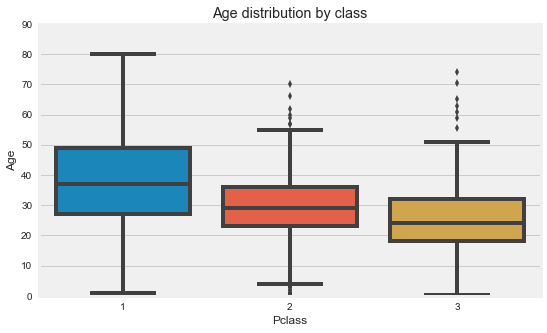

In [230]:
sns.boxplot(x='Pclass', y='Age', data=df3);
plt.title('Age distribution by class');
plt.ylim(0,90);

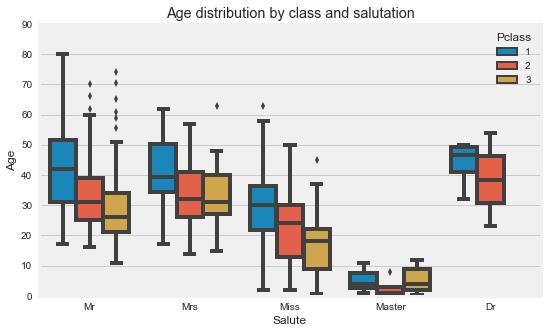

In [232]:
sns.boxplot(x='Salute', y='Age', hue='Pclass', data=df3);
plt.title('Age distribution by class and salutation');
plt.ylim(0,90);

Observations:

- There are differences in median ages when grouped by salutation and class (separately)
- When you do it with both, you can see that even within the same salutation, there are differences in median ages between the difference classes
- Conclusion: We'll fill in missing ages with the median of the combination of salutation and class

In [234]:
# Create a table that shows the median age for each salutation and class
median_ages = df3.groupby(['Salute', 'Pclass'])['Age'].median().to_frame().reset_index()
median_ages.head()

,Salute,Pclass,Age
0,Dr,1,46.5
1,Dr,2,38.5
2,Master,1,4.0
3,Master,2,1.0
4,Master,3,4.0


In [236]:
# Define a function that takes the index of a row in the dataframe
# and returns the median age for that salute and class
def get_median_age(indexer):
    try:
        return median_ages['Age'][(median_ages['Salute']==df3.ix[indexer,'Salute']) & \
                                  (median_ages['Pclass']==df3.ix[indexer,'Pclass'])]
    except:
        return 'failed'

In [237]:
# Get the indices of the rows with missing ages
missing_age = df3[df3['Age'].isnull()].index.tolist()

In [238]:
# For each missing row, use df2.set_value(index, col, value)
# to set the value to the median age for that salute and class
for i in missing_age:
    df3.set_value(index=i, col="Age", value=get_median_age(i))

In [239]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Salute         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [240]:
# We will still drop the whole Cabin row because there's no feasible method of imputation
del df3["Cabin"]

In [241]:
# And we will drop the 2 missing rows in Embarked
df3.dropna(inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
Salute         889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


### Testing our imputation

- Let's evaluate our models again based on our imputed data

In [243]:
df3 = pd.get_dummies(df3, columns=["Pclass", "Sex", "Embarked"], drop_first=True)
df3.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Salute,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Mr,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Mrs,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Miss,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,Mrs,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Mr,0,1,1,0,1


In [244]:
X = df3[features]
y = df3["Survived"]

In [245]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.3)

In [246]:
scaler.fit(X_train[["Age"]])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [247]:
X_train_scaled = X_train.copy()
X_train_scaled["Scaled_age"] = scaler.transform(X_train[["Age"]])
X_train_scaled.drop("Age", axis=1, inplace=True)

X_test_scaled = X_test.copy()
X_test_scaled["Scaled_age"] = scaler.transform(X_test[["Age"]])
X_test_scaled.drop("Age", axis=1, inplace=True)

------------------------------------------------
Accuracy of KNN model: 0.797752808988764

Classification report for KNN model

                 precision    recall  f1-score   support

Did_not_survive       0.81      0.87      0.84       165
       Survived       0.77      0.68      0.72       102

    avg / total       0.80      0.80      0.79       267

Confusion matrix for KNN model

                 Did_not_survive  Survived
Did_not_survive              144        21
Survived                      33        69

------------------------------------------------
Accuracy of Logistic Regression model: 0.7715355805243446

Classification report for Logistic Regression model

                 precision    recall  f1-score   support

Did_not_survive       0.80      0.84      0.82       165
       Survived       0.72      0.66      0.69       102

    avg / total       0.77      0.77      0.77       267

Confusion matrix for Logistic Regression model

                 Did_not_survive  Survi

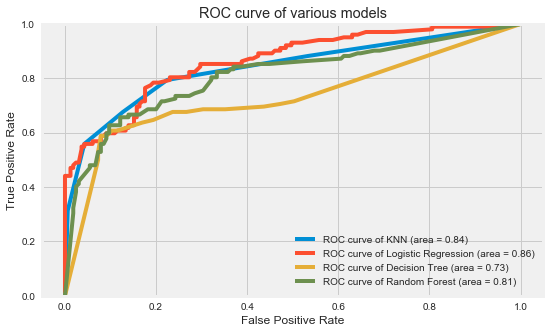

In [249]:
# Evaluate a K nearest neighbors model
eval_model(neighbors.KNeighborsClassifier(), "KNN", xtrain=X_train_scaled, 
           xtest=X_test_scaled, ytrain=y_train, ytest=y_test)


# Evaluate a Logistic Regression model
# I'm using the one with cross validation
eval_model(linear_model.LogisticRegressionCV(cv=5), "Logistic Regression", xtrain=X_train_scaled, 
           xtest=X_test_scaled, ytrain=y_train, ytest=y_test) 

# Evaluate a Decision Tree model
eval_model(tree.DecisionTreeClassifier(), "Decision Tree", xtrain=X_train_scaled, 
           xtest=X_test_scaled, ytrain=y_train, ytest=y_test)

# Evaluate a Random Forest model
eval_model(ensemble.RandomForestClassifier(), "Random Forest", xtrain=X_train_scaled, 
           xtest=X_test_scaled, ytrain=y_train, ytest=y_test)

- In terms of performance, our models didn't do any better than before.
- Was the imputation of variables useful in this case?

## Visualize a decision tree classifier

[Example of a visualization](http://scikit-learn.org/stable/_images/iris.svg)  
[sklearn reference](http://scikit-learn.org/stable/modules/tree.html)

In [260]:
dt = fit_model(tree.DecisionTreeClassifier(max_depth=3), X, y)

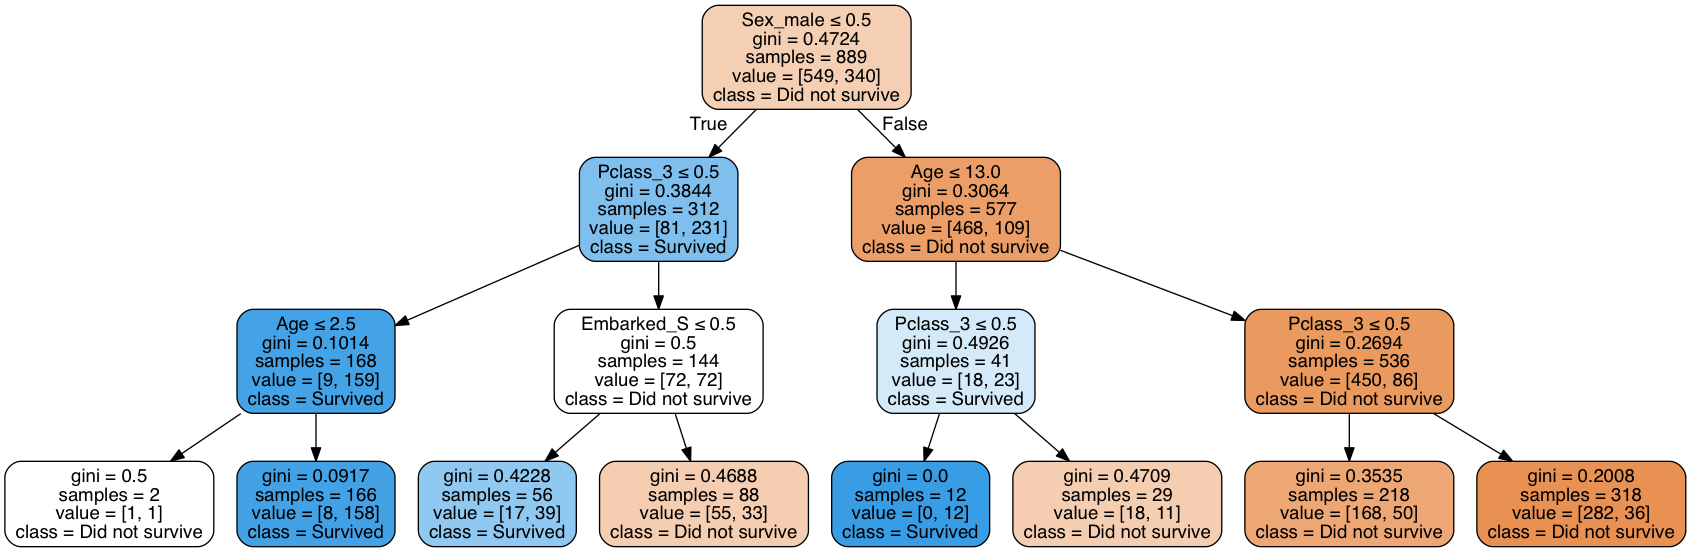

In [261]:
from IPython.display import Image
import pydotplus
dot_data = tree.export_graphviz(dt, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["Did not survive", "Survived"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  